# Decision Tree for Predictive Modeling

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#load the dataset
data=pd.read_csv('customer shopping (4).csv')
data.head()

,Customer ID,Star_rating,Reviews_posted
0,462809,4,5
1,462643,1,2
2,466315,1,3
3,461735,1,2
4,462669,1,1


In [78]:
data.isna().sum()

Customer ID       0
Star_rating       0
Reviews_posted    0
dtype: int64

In [79]:
data=data.fillna(method='bfill')
data.isna().sum()

Customer ID       0
Star_rating       0
Reviews_posted    0
dtype: int64

In [80]:
data.head(2)

,Customer ID,Star_rating,Reviews_posted
0,462809,4,5
1,462643,1,2


In [81]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Star_rating'}>],
       [<Axes: title={'center': 'Reviews_posted'}>, <Axes: >]],
      dtype=object)

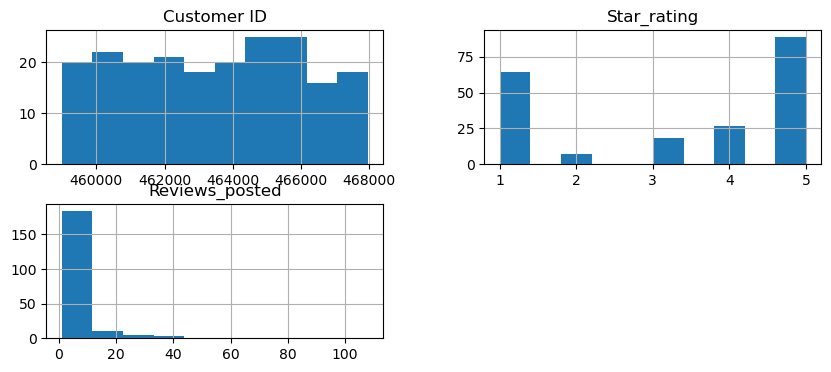

In [82]:
data.hist(figsize=(10,4))

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.45,random_state=30)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (112, 2)

Training data-y- Shape:	 (112, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (93, 2)

Testing data(y-Outcome) Shape:	 (93, 1)


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [  3   7   2   3   4   8   2   3   1   4  12   2   1   2  13   4   3   1
   5   3   3   3   1   5   1   3  14   1   1   1   6   1   9   7   2   1
   5   5   9  13  23   1   1   1   2   3   9   1   1  43   1   3   9   3
   2   1   2   1  14   1   5  12   2   6  12  11   1 108   2   5  23  43
   1   1   6   4  23   5   3   3   3   3  11   1   3   1  12   9  12   3
   2   6   1]

Testi

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [89]:
#3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
features = data.drop(['Customer ID', 'Star_rating'], axis=1)
target_sales = data['Reviews_posted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_sales, test_size=0.2, random_state=42)

# Initialize the decision tree regression model
regression_model = DecisionTreeRegressor(random_state=42)

# Train the regression model
regression_model.fit(X_train, y_train)

# Predict sales for the test set
predictions = regression_model.predict(X_test)

In [90]:
#Calculate mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 2.658536585365854
R-squared: 0.9748262226378108


[Text(0.5204522357723578, 0.9615384615384616, 'x[0] <= 463996.5\nentropy = 3.33\nsamples = 112\nvalue = [25, 22, 18, 7, 12, 4, 4, 3, 4, 1, 1, 3, 2, 2\n1, 1, 1, 1]'),
 Text(0.18673780487804878, 0.8846153846153846, 'x[0] <= 460154.5\nentropy = 3.264\nsamples = 65\nvalue = [14, 10, 10, 6, 9, 1, 3, 3, 2, 0, 1, 2, 2, 0\n0, 1, 0, 1]'),
 Text(0.036585365853658534, 0.8076923076923077, 'x[0] <= 459392.5\nentropy = 1.806\nsamples = 15\nvalue = [6, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.016260162601626018, 0.7307692307692307, 'x[0] <= 459077.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.008130081300813009, 0.6538461538461539, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.024390243902439025, 0.6538461538461539, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.056910569105691054, 0.7307692307692307, 'x[0] <

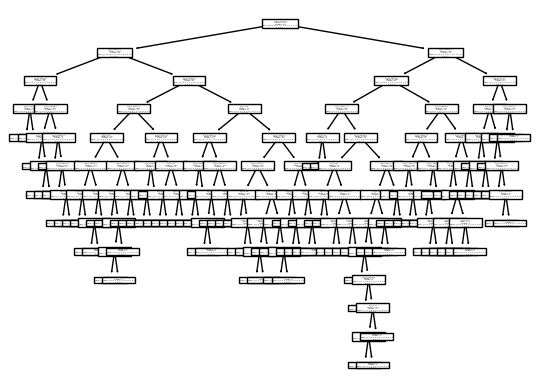

In [96]:
#4
from sklearn import tree
tree.plot_tree(dt_clf)


[Text(0.5204522357723578, 0.9615384615384616, 'x[0] <= 463996.5\nentropy = 3.33\nsamples = 112\nvalue = [25, 22, 18, 7, 12, 4, 4, 3, 4, 1, 1, 3, 2, 2\n1, 1, 1, 1]'),
 Text(0.18673780487804878, 0.8846153846153846, 'x[0] <= 460154.5\nentropy = 3.264\nsamples = 65\nvalue = [14, 10, 10, 6, 9, 1, 3, 3, 2, 0, 1, 2, 2, 0\n0, 1, 0, 1]'),
 Text(0.036585365853658534, 0.8076923076923077, 'x[0] <= 459392.5\nentropy = 1.806\nsamples = 15\nvalue = [6, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.016260162601626018, 0.7307692307692307, 'x[0] <= 459077.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.008130081300813009, 0.6538461538461539, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.024390243902439025, 0.6538461538461539, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.056910569105691054, 0.7307692307692307, 'x[0] <

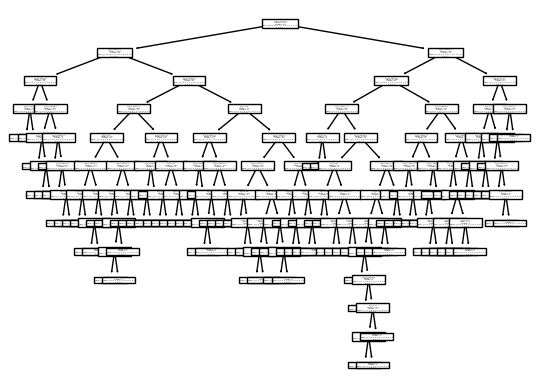

In [97]:
tree.plot_tree(dt_clf)

In [99]:
 from sklearn.tree import DecisionTreeClassifier
 dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
 print('*'*100)
 print('Decison Tree Model')
 print('*'*100)
 print('\n Training Phase')
 dt_clf.fit(xtrain,ytrain)
 print('Hyperparameter:\n',dt_clf.get_params())
 print('Training Completed')
 print('='*100)
 print('\n Test Phase')
 ypred=dt_clf.predict(xtest)
 print('Predicted class labels for the test samples:\n',ypred)
 print()
 print('Testing completed')
 print('='*100)
 #import metrics
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import classification_report
 print('*'*100)
 print('Decison Tree - Performance Measures')
 print('*'*100)
 print('Accuracy Score:\t',accuracy_score(ytest,ypred))
 print('='*100)
 print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
 print('='*100)
 print('Classification Report\n',classification_report(ytest,ypred))
 print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [5 5 2 1 5 5 1 1 1 2 5 2 5 2 1 2 2 1 2 2 1 1 1 2 2 1 5 5 1 5 2 5 5 5 2 5 5
 5 1 1 1 5 1 1 2 1 2 5 1 5 2 1 5 1 1 1 1 1 5 1 5 5 2 2 5 2 1 5 5 5 1 5 1 1
 2 5 2 2 5 1 2 2 2 2 1 5 5 2 5 5 2 2 2]

Testing completed
****************************************************************************************************
Decison Tree - Performance Measures
******************************************

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.8333333333333334, 'x[0] <= 463996.5\nentropy = 3.33\nsamples = 112\nvalue = [25, 22, 18, 7, 12, 4, 4, 3, 4, 1, 1, 3, 2, 2\n1, 1, 1, 1]'),
 Text(0.25, 0.5, 'x[0] <= 460154.5\nentropy = 3.264\nsamples = 65\nvalue = [14, 10, 10, 6, 9, 1, 3, 3, 2, 0, 1, 2, 2, 0\n0, 1, 0, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.806\nsamples = 15\nvalue = [6, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 3.392\nsamples = 50\nvalue = [8, 6, 6, 6, 9, 1, 3, 3, 1, 0, 1, 2, 2, 0\n0, 1, 0, 1]'),
 Text(0.75, 0.5, 'x[0] <= 466542.5\nentropy = 3.032\nsamples = 47\nvalue = [11, 12, 8, 1, 3, 3, 1, 0, 2, 1, 0, 1, 0, 2\n1, 0, 1, 0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 3.066\nsamples = 36\nvalue = [6, 10, 6, 1, 3, 3, 1, 0, 2, 1, 0, 0, 0, 1\n1, 0, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.04\nsamples = 11\nvalue = [5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1\n0, 0, 0, 0]')]

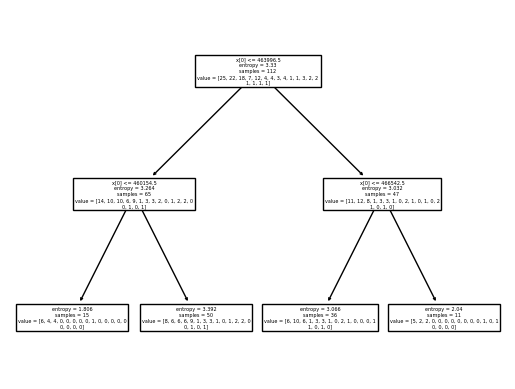

In [100]:
tree.plot_tree(dt_clf)


In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=4)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

4


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


In [107]:
grid_search.best_params_

{'max_depth': 4}

In [94]:
grid_search.cv_results_


{'mean_fit_time': array([0.00442681, 0.00261269, 0.00219398, 0.00239749, 0.00300913,
        0.0039319 , 0.00282497, 0.00313025]),
 'std_fit_time': array([0.00234429, 0.00080371, 0.00040732, 0.00080746, 0.00063766,
        0.00064751, 0.00097208, 0.00161766]),
 'mean_score_time': array([0.0037818 , 0.00332904, 0.00300822, 0.00240307, 0.00382314,
        0.00378556, 0.00357604, 0.00260143]),
 'std_score_time': array([0.00115987, 0.00042141, 0.00063611, 0.00049374, 0.00117466,
        0.00096442, 0.00080048, 0.0004909 ]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.08695652, 0.13043478, 0.13043478, 0.13043478, 0.13043478,
        0.130

In [108]:
grid_search.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [91]:
##6 Initialize the decision tree regression model with pruning parameters
pruned_regression_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)

# Train the pruned regression model
pruned_regression_model.fit(X_train, y_train)

# Predict sales for the test set using the pruned model
pruned_predictions = pruned_regression_model.predict(X_test)

# Evaluate the pruned model's performance
pruned_mse = mean_squared_error(y_test, pruned_predictions)
pruned_r_squared = r2_score(y_test, pruned_predictions)

print(f'Pruned Mean Squared Error: {pruned_mse}')
print(f'Pruned R-squared: {pruned_r_squared}')


Pruned Mean Squared Error: 1.188246951219512
Pruned R-squared: 0.9887484474105201
